In [16]:
import numpy as np
from scipy.optimize import curve_fit

import pandas as pd
pd.set_option('display.max_rows',100)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib  # for exporting pdf text
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['figure.autolayout'] = 'True'

font = {'family': 'Arial',
        'size'  : 14}
plt.rc('font', **font)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)


# PLOT FUNCTIONS
c0='#3182bd'  # '#3182bd'
c1='#de2d26'
c_d = {'01': c0,
       '02': c0,
       '03': c1,
       '04': c0,
       '05': c0,
       '06': c1,
       '07': c0,
       '08': c0,
       '09': c1,
       '10': c0,
       '11': c1,
       '12': c0}

d_u = {-1:  '100 mM',
       -2:  '10 mM',
       -3:  '1 mM',
       -4:  '100 μM',
       -5:  '10 μM',
       -6:  '1 μM',
       -7:  '100 nM',
       -8:  '10 nM',
       -9:  '1 nM',
       -10: '100 pM',
       -11: '10 pM',
       -12: '1 pM',
       -13: '100 fM',
       -14: '10 fM',
       -15: '1 fM',
       -16: '100 aM',
       -17: '10 aM',
       -18: '1 aM',
       -19: '100 zM',
       -20: '10 zM',
       -21: '1 zM'}

# matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=['#6B00A6', 
#                                                                   '#00A651',
#                                                                   '#A66C00']) 

def plot(df,x,y, series, cgrid=True):
    plt.figure(figsize=(4,8))
    plt.grid(axis='x', color='lightgrey', lw=.2)

    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.yscale('log')
    
    for ser in series:
        dfi = df.query('series=="{}"'.format(ser)).index
        xs,ys = x[dfi], y[dfi]
        plt.scatter(xs,ys, marker='_', s=100, label=ser)
    
    if cgrid:
        for line, k in zip(plt.gca().get_xgridlines(), sorted(c_d.keys())):
            line.set_color(c_d[k])
            

def plot2(df,x,y, low, high):
    plt.figure(figsize=plt.figaspect(.45))
    plt.grid(axis='y', color='lightgrey', lw=.75, zorder=0)
    plt.xlabel('')
    plt.ylabel('')
    plt.yscale('log')
    plt.xticks(ticks=[])
    # plt.xticks(rotation=-90)
    # plt.xticks(fontsize=14, color='#58595B')

    plt.bar(x,y, color=[c_d[s] for s in data.col.values], alpha=.85, zorder=5)
    
    hline_top(high)
    hline_bottom(lods['_'.join([sig,ins,ser])])

    y0,y1 = plt.ylim()[0], plt.ylim()[1]
    rect = plt.Rectangle((0-.8,y0), 12.25,x1-x0, color='#6B00A6', alpha=.08, lw=1, zorder=0)
    plt.gca().add_artist(rect)
    rect = plt.Rectangle((12-.5,y0), 11.95,x1-x0, color='#00A651', alpha=.08, lw=1, zorder=0)
    plt.gca().add_artist(rect)
    rect = plt.Rectangle((23.85-.4,y0), 12.2,x1-x0, color='#A66C00', alpha=.08, lw=1, zorder=0)
    plt.gca().add_artist(rect)
    
    plt.gcf().canvas.draw()
    labels = plt.yticks()[1]
    yticks = [d_u[int(lab.get_text()[lab.get_text().find('-'):-3])] for lab in labels]
    plt.gca().set_yticklabels(yticks)
    plt.yticks(fontsize=21, color='#58595B')
    plt.gca().yaxis.set_tick_params(which='major', length=8, width=1)
    plt.gca().yaxis.set_tick_params(which='minor',length=4)

    plt.xlim(-.8,35.7)            
            

def hline(y, label_str):
    plt.hlines(y,-.5,11.5, lw=.5, color='grey', zorder=200)
    plt.annotate(label_str.format(y), (-.5,y), xytext=(0, 4), textcoords='offset points', color='darkgrey', fontsize=14)
    
def hline_top(y):
    plt.hlines(y,-.6,37.3 , lw=1, color='#262626', clip_on=False,zorder=200)
    ly = np.floor((np.log10(y)/3))*3
    plt.annotate('{:.3g} {:}'.format(y/(10.**ly), d_u[ly][-2:]), (35.5,y), 
                 xytext=(4, -4), textcoords='offset points', rotation=-90, va='top',
                 color='#58595B', fontsize=21)
    
def hline_bottom(y):
    plt.hlines(y,-.6,37.3 , lw=1, color='#262626',clip_on=False, zorder=200)
    ly = np.floor((np.log10(y)/3))*3
    plt.annotate('{:.3g} {:}'.format(y/(10.**ly), d_u[ly][-2:]), (35.5,y), 
                 xytext=(4, 5), textcoords='offset points', rotation=-90, va='bottom',
                 color='#58595B', fontsize=21)

# Load Data

In [2]:
df_s = pd.read_csv('data/scope/20190906-1637_data.csv')
df_s.rename(columns={'timestamp':'ts'}, inplace=True)
log = pd.read_csv('data/scope/20190906-1119_log.csv')

data = pd.read_csv('data/output-plate.tsv', sep='\t')
data = pd.read_csv('data/output-plate2.tsv', sep='\t')
data['col'] = data.well.str[1:]
data.head(1)

,n,s,r,c,well,well_waste,series,conc_fluorophore,conc_dna,vol,...,needle_wash,sheath,x,y,z,rfu_scope,rfu_pr,rfu_qpcr,cq_qpcr,col
0,0,0,0,0,A01,A01,waste,NaN,NaN,NaN,...,NaN,NaN,2.493,12.749,-0.85,NaN,NaN,NaN,NaN,01


# Extract Scope RFU

In [3]:
def segment(df, starts, stops):
    arr = np.ones_like(df.index)*np.nan
    for i,(s0,s1) in enumerate(zip(starts,stops)):
        arr[(s0<=df.t) & (df.t<=s1)] = i
    return arr

In [41]:
%matplotlib tk

In [44]:
# Intensity Plot

# DF SETUP --------------------------
df = df_s
# l = log[log.fn.str.contains('iteration')].reset_index(drop=True)
l = log.query('fn in ["flush","prime","setup","cleanup","iteration"] or ((fn=="to_collector") & (dt.round()==233.))').copy()

# l = log.query('fn in ["flush","collect","prime","setup","cleanup","iteration"]').copy()
l['th_b'] =l.th.str.split('_').apply(lambda x: x[-1])
l['th'] = l.th.str.split('_').apply(lambda x: x[0])
l['name'] = l['th']

t0 = log[log.fn=='idle'].t_in.iloc[0]
# t1 = log.t_out.iloc[-1]
t1 = log.t_out[(log.fn=='iteration')&(log.fn_in.str.contains('D12'))].iloc[0]

t0i = log.t_in[(log.fn=='iteration')&(log.fn_in.str.contains('B05'))].iloc[0]
t1i = log.t_out[(log.fn=='iteration')&(log.fn_in.str.contains('B07'))].iloc[0]

y_min = 1.1
y_max = df.roi_mean[(df.t>=t0) & (df.t<=t1)].max()


# PLOT -----------------------------
plt.figure(figsize=(15,6))
plt.box(None)
plt.tick_params('y',which='major',length=6)
plt.tick_params('y',which='minor',length=4)
plt.xlabel('t [s]')
plt.xlim(0,t1-t0)
plt.ylabel('RFU')
plt.ylim(y_min, y_max+10)
plt.yscale('log')

c_dict = {'prime':'#00a651',
          'to_collector':'#0075cf',
          'flush':'#ed1c24',
          'setup':'grey',
          'iteration':'grey',
          'cleanup':'grey'}

c_g = {'prime':'darkgrey',
        'to_collector':'white',
        'flush':'grey',
        'setup':'white',
        'iteration':'white',
        'cleanup':'white'}

series_labels = [' +needle wash / -sheath',
                 ' +needle wash / +sheath',
                 ' -needle wash / +sheath',
                 '']


l['blah'] = 0
for i,row in pd.DataFrame(l.groupby(['blah'])).iterrows():
    r=row[1]
    for j,(x0,x1,s) in enumerate(zip(r.t_in - t0, r.t_out - t0, r['fn'])):
        y0=i+j*0
        rect = plt.Rectangle((x0,y0),x1-x0,y_max-y0, color=c_g[s], alpha=1)
        plt.gca().add_artist(rect)

plt.fill_between(df.t-t0, df.roi_mean, np.ones_like(df.t)*df.roi_mean.max(), step="mid", color='white', alpha=1, zorder=100, lw=0)
# plt.scatter(df.t-t0, df.roi_mean, color='black', marker='_', s=1, alpha=.4, zorder=102)

l = log.query('fn in ["iteration"]').copy()
concentrations = l.fn_in.str.split().apply(lambda lst: lst[[i+1 for i,e in enumerate(lst) if e=='conc_fluorophore'][0]])
for i,(x0,x1,conc) in enumerate(zip(l.t_in - t0,
                                    l.t_out - t0,
                                    concentrations)):
    if i%12==0:
        s = series_labels[i//12]
        plt.annotate(' {}'.format(s),(x0, y_max+2), fontsize=12, zorder=103)
        plt.vlines(x0,y_min, y_max+10, lw=.5, color='black', alpha=1, zorder=102)
    plt.vlines(x0,y_min, y_max, lw=.5, color='darkgrey', alpha=.62, zorder=101)
    rect = plt.Rectangle((x0,.1),x1-x0,y_max, color=['#3182bd','#de2d26'][conc!='0'], lw=0, alpha=.5, zorder=5)
    plt.gca().add_artist(rect)

# inset
rect = plt.Rectangle((t0i-t0,y_min+.01),t1i-t0i,y_max-y_min, fill=None, lw=1.2, color='#00a651', alpha=.5, zorder=105)
plt.gca().add_artist(rect)
plt.tight_layout()
plt.savefig('../figs/subfigs/scope-sequence.pdf')
plt.show()

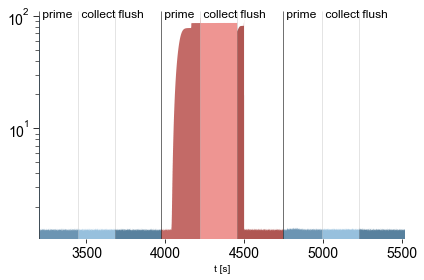

In [5]:
# INSET

# DF SETUP --------------------------
df = df_s[(df_s.t>=t0i) & (df_s.t<=t1i)]
# l = log[log.fn.str.contains('iteration')].reset_index(drop=True)
l = log.query('fn in ["flush","prime","setup","cleanup","iteration"] or ((fn=="to_collector") & (dt.round()==233.))').copy()

# l = log.query('fn in ["flush","collect","prime","setup","cleanup","iteration"]').copy()
l['th_b'] =l.th.str.split('_').apply(lambda x: x[-1])
l['th'] = l.th.str.split('_').apply(lambda x: x[0])
l['name'] = l['th']

l = l[(l.t_in>=t0i) & (l.t_out<=t1i)]

y_min = 1.05
y_max = df.roi_mean[(df.t>=t0) & (df.t<=t1)].max()


# PLOT -----------------------------
plt.figure(figsize=(6,4))
plt.box(None)
plt.tick_params('y',which='major',length=6)
plt.tick_params('y',which='minor',length=4)
plt.xlabel('t [s]')
plt.xlim(t0i-t0,t1i-t0)
# plt.ylabel('RFU')
plt.ylim(y_min, y_max+13)
plt.yscale('log')

c_g = {'prime':'darkgrey',
        'to_collector':'white',
        'flush':'grey',
        'setup':'white',
        'iteration':'white',
        'cleanup':'white'}
d = {'prime':'prime', 'to_collector':'collect', 'flush':'flush'}

l['blah'] = 0
for i,row in pd.DataFrame(l.groupby(['blah'])).iterrows():
    r=row[1]
    for j,(x0,x1,s) in enumerate(zip(r.t_in - t0, r.t_out - t0, r['fn'])):
        y0=i+j*0
        rect = plt.Rectangle((x0,y0),x1-x0,y_max-y0, color=c_g[s], alpha=1)
        plt.gca().add_artist(rect) 
        if s in ['prime','to_collector','flush']:
            plt.vlines(x0,y_min, y_max+13, lw=.5, color='darkgrey', alpha=.62, zorder=101)
            plt.annotate(' {}'.format(d[s]),(x0, y_max), fontsize=12, zorder=103)


plt.fill_between(df.t-t0, df.roi_mean, np.ones_like(df.t)*(y_max+13), step="mid", color='white', alpha=1, zorder=100, lw=0)

l = l.query('fn in ["iteration"]')
concentrations = l.fn_in.str.split().apply(lambda lst: lst[[i+1 for i,e in enumerate(lst) if e=='conc_fluorophore'][0]])
for i,(x0,x1,conc) in enumerate(zip(l.t_in - t0,
                                    l.t_out - t0,
                                    concentrations)):
    plt.vlines(x0,y_min, y_max+12, lw=.5, color='black', alpha=1, zorder=102)
    rect = plt.Rectangle((x0,.1),x1-x0,y_max, color=['#3182bd','#de2d26'][conc!='0'], lw=0, alpha=.5, zorder=5)
    plt.gca().add_artist(rect)


plt.tight_layout()
plt.savefig('../figs/subfigs/scope-inset.pdf')
plt.show()

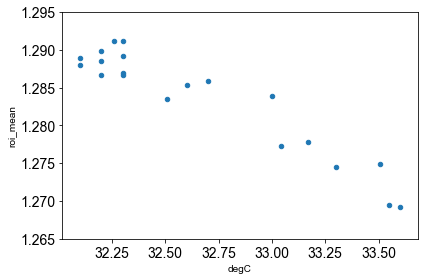

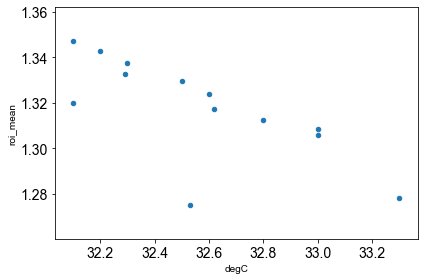

In [6]:
df = df_s.copy()
lf = log.query('(fn=="flush")').reset_index()
arr = segment(df, lf.t_in, lf.t_out)

temp = df_s.groupby(arr).mean().copy()
temp = temp[temp.roi_mean<1.35]
temp[(1567780000>temp.t)].plot.scatter('degC','roi_mean')
plt.ylim(1.265, 1.295)


df = df_s.copy()
lf = log.query('(fn=="flush")').reset_index()
arr = segment(df, lf.t_in, lf.t_out)

temp = df_s.groupby(arr).mean().copy()
temp = temp[temp.roi_mean<1.35]
temp[(1567780000<temp.t)].plot.scatter('degC','roi_mean')
# plt.ylim(1.265, 1.295)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


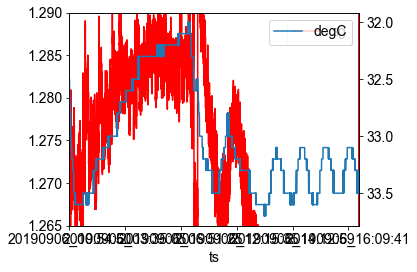

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


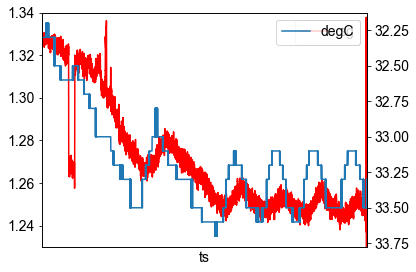

In [29]:
from scipy import signal

df = df_s[(df_s.roi_mean < 1.30)]
df['sg'] = signal.savgol_filter(df.roi_mean,75,3)

fig,ax = plt.subplots()
df.plot('ts','sg', ax=ax, color='red')
plt.ylim(1.265,1.29)
ax2 = ax.twinx()
ax2.invert_yaxis()
df.plot('ts','degC', ax=ax2)
plt.show()

df = df_s[(df_s.roi_mean < 1.34) & (1567784000<df_s.t)]
df['sg'] = signal.savgol_filter(df.roi_mean,75,3)

fig,ax = plt.subplots()
df.plot('ts','sg', ax=ax, color='red')
plt.ylim(1.23,1.34)
ax2 = ax.twinx()
ax2.invert_yaxis()
plt.xticks(ticks=[])
df.plot('ts','degC', ax=ax2)
plt.show()

In [8]:
data['rfu_scope2'] = [np.array(list())]*len(data)

# get collector segments
df = df_s.copy()
lf = log.query('((fn=="to_collector") & (dt.round()==233.))').reset_index()
arr = segment(df, lf.t_in, lf.t_out)

# put means of roi_means of segments in data
vals = df.groupby(arr).roi_mean.apply(lambda x: x.values)
data.loc[12:(12+47),'rfu_scope2'] = vals.values

In [9]:
test = pd.melt(data.rfu_scope2.apply(pd.Series).reset_index(), 
                id_vars=['index'],
                value_name='rfu_scope2') \
                .drop('variable', axis=1) \
                .sort_values('index')

test['well'] = data.well[test['index']].values
test['col'] = test.well.str[1:]
test['conc'] = data.conc_fluorophore[test['index']].values
test['series'] = data.series[test['index']].values

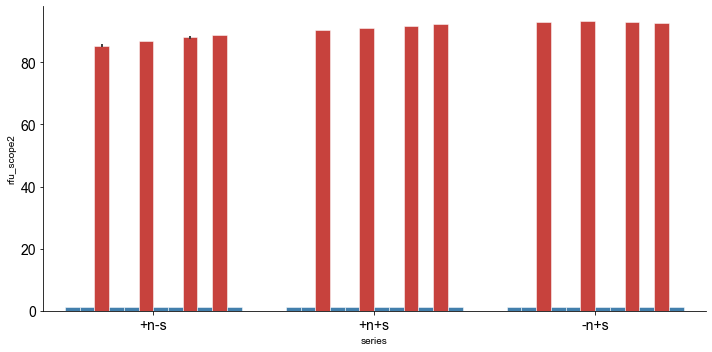

In [10]:
c0='#3182bd'  # '#3182bd'
c1='#de2d26'
c_d = {'01': c0,
       '02': c0,
       '03': c1,
       '04': c0,
       '05': c0,
       '06': c1,
       '07': c0,
       '08': c0,
       '09': c1,
       '10': c0,
       '11': c1,
       '12': c0}
sns.catplot(data=test[  (test.series!='std-int')
                      ].dropna(),
            x='series', y='rfu_scope2', kind='bar',
            ci=95, errwidth=2, edgecolor='#ffffff', lw=.5, alpha=1, legend=False, aspect=2,
            hue='col', palette=c_d)
# & (test.col.apply(lambda x: x in['01','02','04','05','07','08','10','12']))
# hue='col', palette=c_d

# plt.ylim(1.27,1.36)
# plt.yscale('log')
plt.show()

13         NaN
15    0.009262
16   -0.004350
18    0.006258
19   -0.003280
21    0.006645
23    0.003652
25   -0.005645
27    0.005935
28   -0.002707
30    0.006407
31   -0.003187
33    0.004212
35   -0.000419
37   -0.006952
39    0.009761
40   -0.007810
42    0.063103
43   -0.005484
45    0.004039
47   -0.004900
Name: rfu_scope, dtype: float64


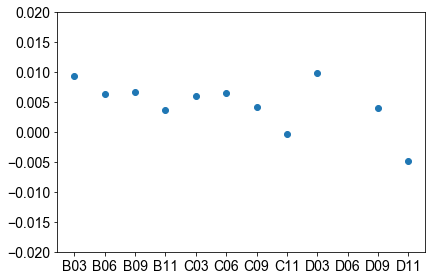

well
B    0.006454
C    0.004034
D    0.018001
Name: rfu_scope, dtype: float64

In [186]:
# DIFFERENTIAL of blanks before/after injection
df2=data[  np.isin(data.col,['02','04','05','07','08','10','12'])
         & np.isin(data.r,[1,2,3])
         ][['well','rfu_scope']]
diffs = df2.rfu_scope.diff()
diffs = diffs
print(diffs)
inds2 = np.isin(data.well[diffs.index-1].str[1:],['03','06','09','11'])

x= data.well[diffs.index-1][inds2]
y= diffs[inds2]
plt.scatter(x,y)
# plt.xticks(rotation=-90)
plt.ylim(-.02,.02)
plt.show()

y.groupby(data.well[diffs.index][inds2].str[0]).mean()

# Signal of Blank
<!-- $S_{detection} = S_{blank} + 3 \sigma_{blank}$ -->
- aggregate rfu, cq values as columns in `data`

In [6]:
def sod_fn(blanks):
    return np.mean(blanks) + 0*np.std(blanks)

sods = {}

## Scope

In [7]:
sig_ins = 'rfu_scope'
data[sig_ins] = np.nan

# get collector segments
df = df_s.copy()
lf = log.query('((fn=="to_collector") & (dt.round()==233.))').reset_index()
arr = segment(df, lf.t_in, lf.t_out)

# put means of roi_means of segments in data
well_means = df.groupby(arr).roi_mean.mean()
data.loc[12:(12+47),sig_ins] = well_means.values

1.2954198476260324

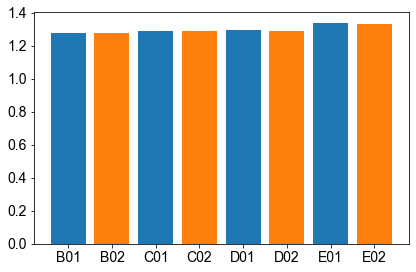

In [33]:
# SOD calculation
blank_wells = ['B01', 'B02', 
              'C01', 'C02', 
              'D01', 'D02',
              'E01', 'E02']
inds = data[data.well.apply(lambda x: x in blank_wells)].index.values -12
blanks = df_s[np.isin(arr,inds)]
gb = blanks.groupby(arr[np.isin(arr,inds)]).mean()
plt.bar(np.array(blank_wells)[gb.reset_index().index.values], gb.roi_mean)

blank_wells = ['B02', 
              'C02', 
              'D02',
              'E02']
inds = data[data.well.apply(lambda x: x in blank_wells)].index.values -12
blanks = df_s[np.isin(arr,inds)]
gb = blanks.groupby(arr[np.isin(arr,inds)]).mean()
plt.bar(np.array(blank_wells)[gb.reset_index().index.values], gb.roi_mean)

sods[sig_ins] = sod_fn(blanks.roi_mean)
sods[sig_ins]

## Plate Reader

104971.75

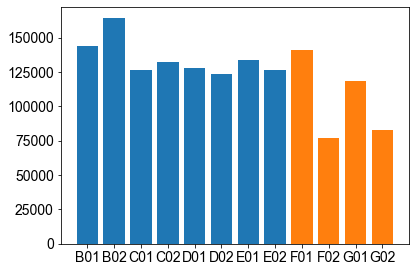

In [37]:
# SOD calculation
sig_ins = 'rfu_pr'
blanks = data.groupby('well').mean().loc[['B01', 'B02', 
                                          'C01', 'C02', 
                                          'D01', 'D02',
                                          'E01', 'E02',
                                          'F01', 'F02',
                                          'G01', 'G02']]
plt.bar(blanks.index.values,blanks[sig_ins].values)

blanks = data.groupby('well').mean().loc[['F01','F02',
                                          'G01','G02']]
plt.bar(blanks.index.values,blanks[sig_ins].values)

sods[sig_ins] = sod_fn(blanks[sig_ins])
sods[sig_ins]

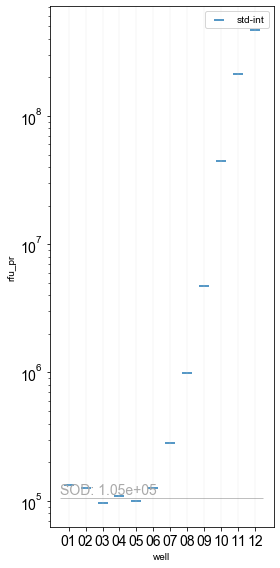

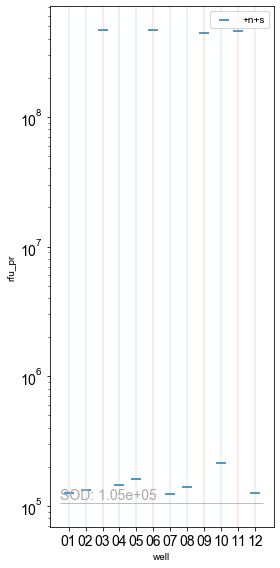

In [10]:
sig_ins = 'rfu_pr'
df,x,y = data, data.well.str[1:], data[sig_ins]

series = ['std-int']
plot(df,x,y, series, False)
hline(sods[sig_ins], 'SOD: {:1.2e}')
plt.legend(frameon=True)
plt.show()

series = ['+n-s','+n+s','-n+s']
series = ['+n+s']

plot(df,x,y, series)
hline(sods[sig_ins], 'SOD: {:1.2e}')
plt.legend(frameon=True)
plt.show()

## qPCR

31.675000000000004

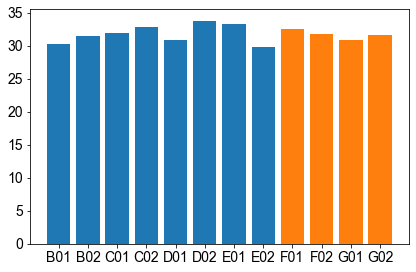

In [39]:
# SOD calculation
sig_ins = 'cq_qpcr'
blanks = data.groupby('well').mean().loc[['B01', 'B02', 
                                          'C01', 'C02', 
                                          'D01', 'D02',
                                          'E01', 'E02',
                                          'F01', 'F02',
                                          'G01', 'G02']]
plt.bar(blanks.index.values,blanks[sig_ins].values)

blanks = data.groupby('well').mean().loc[['F01','F02',
                                          'G01','G02']]
plt.bar(blanks.index.values,blanks[sig_ins].values)

sods[sig_ins] = sod_fn(blanks[sig_ins])
sods[sig_ins]

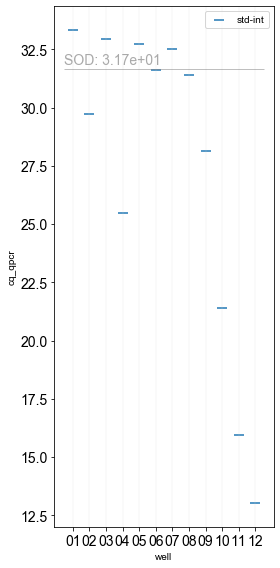

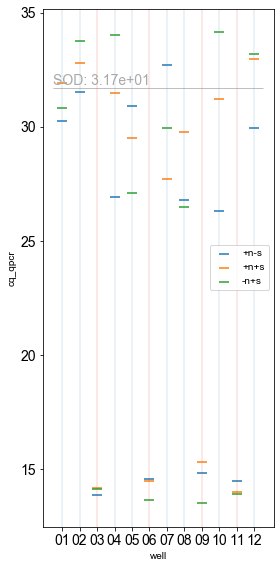

In [12]:
sig_ins = 'cq_qpcr'
df,x,y = data, data.well.str[1:], data[sig_ins]

series = ['std-int']
plot(df,x,y, series, False)
plt.yscale('linear')
hline(sods[sig_ins], 'SOD: {:1.2e}')
plt.legend(frameon=True)
plt.show()

series = ['+n-s','+n+s','-n+s']
plot(df,x,y, series)
plt.yscale('linear')
hline(sods[sig_ins], 'SOD: {:1.2e}')
plt.legend(frameon=True)
plt.show()

# Standard Curve, LOD, Conc Back-Calc

[LOD Determination 1](http://www.biopharminternational.com/method-validation-essentials-limit-blank-limit-detection-and-limit-quantitation)   
[LOD Determination 2](https://en.wikipedia.org/wiki/Detection_limit)   
[LOD Determination 3](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2556583/)   
[LOD Determination 4](http://www.chemometry.com/Research/LOD.html)   
[LOD Determination 5](http://www.cysonline.org/article.asp?issn=2229-5186;year=2011;volume=2;issue=1;spage=21;epage=25;aulast=Shrivastava)

In [13]:
def stats(y, yh):
    residuals = y - yh
    ss_res = (residuals.sum())**2
    ss_tot = np.sum((y-y.mean())**2)
    r2 = 1 - (ss_res / ss_tot)
    return residuals, r2


# MODELS
def lin2(x, a,b):
    return a*x + b
def lin2i(y, a,b): 
    return (y-b)/a

def slogx2(x, a,b):
    return lin2(np.log10(x), a,b)
def slogx2i(y, a,b):
    return 10**lin2i(y, a,b)

def log4(x, a,b,c,d):
    return ((a-d)/(1.+ ((x/c)**b))) + d
def log4i(y, a,b,c,d):
    return c*((y - a)/(d - y))**(1/b)


popts = {}
lods = {}

## Scope

std-int: 1.0000
SOD: 1.30e+00 rfu
LOD: 3.50e-09 M


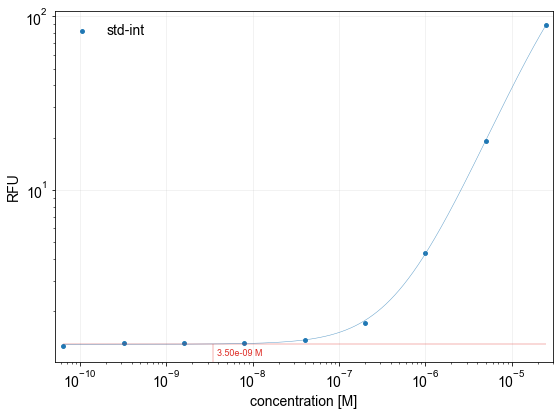

In [28]:
sig_ins = 'rfu_scope'
series = ['std-int']

df = data.query("series in {}".format(series)).query("c>=3")
xf = df.conc_fluorophore[df.conc_fluorophore>0]
yf = df[sig_ins][xf.index].copy()

p0 = [1.02480860e+05, 1.19435629e+00, 1.03834366e-05, 6.55221845e+08]
f,fi = log4, log4i
weight = lambda y: y**.5


# FIT ----------------
for ser in series:
    sig_ins_ser = '{}_{}'.format(sig_ins,ser.split('-')[-1])
    
    x = xf[df.series==ser]
    y = yf[x.index]
    popts[sig_ins_ser],pcov = curve_fit(f,x,y, p0=p0, maxfev=int(1e9), sigma=weight(y))

    yh = f(x, *popts[sig_ins_ser])
    res,r2 = stats(y,yh)
    print('{}: {:1.4f}'.format(ser, r2))
    

# LOD, and BACK CALC ----------------
yff = data[sig_ins].copy()
yff[yff<sods[sig_ins]] = sods[sig_ins]

for ser in series:
    sig_ins_ser = '{}_{}'.format(sig_ins,ser.split('-')[-1])
    lods[sig_ins_ser] = fi(sods[sig_ins], *popts[sig_ins_ser])
    print('SOD: {:1.2e} rfu'.format(sods[sig_ins]))
    print('LOD: {:1.2e} M'.format(lods[sig_ins_ser]))
    
    data['conc_{}_{}'.format(sig_ins.split('_')[-1],ser.split('-')[-1])] = fi(yff, *popts[sig_ins_ser])
    
# PLOT ----------------
plt.figure(figsize=(8,6))
plt.xlim(xf[xf>0].min()*.8, xf.max()*1.2)
plt.ylim(yf.min()*.8, yf.max()*1.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('input concentration [M]')
plt.ylabel(sig_ins)
plt.grid(which='major', alpha=.2)

for i,ser in enumerate(series):
    sig_ins_ser = '{}_{}'.format(sig_ins,ser.split('-')[-1])

    x = xf[df.series==ser]
    y = yf[x.index]
    plt.scatter(x, y, s=15, label=ser)
    
    xs = np.geomspace(x.min(),x.max(),1000)
    plt.plot(xs, f(xs, *popts[sig_ins_ser]), lw=.5, alpha=.7)

    plt.vlines(lods[sig_ins_ser], yf.min()*.8,sods[sig_ins], lw=.35, color='#de2d26')
    plt.annotate('{:1.2e} M'.format(lods[sig_ins_ser]), (lods[sig_ins_ser]*1.1, yf.min()*.87+i*2e4), color='#de2d26', fontsize=9)

plt.hlines(sods[sig_ins], xf.min(),xf.max(), lw=.35, color='#de2d26')

plt.legend(frameon=False)
plt.show()

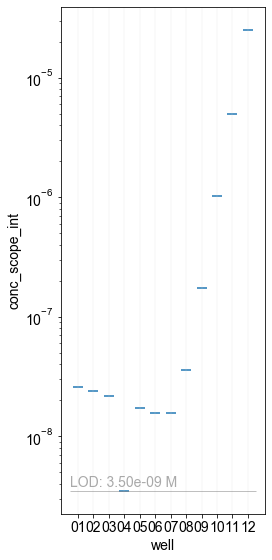

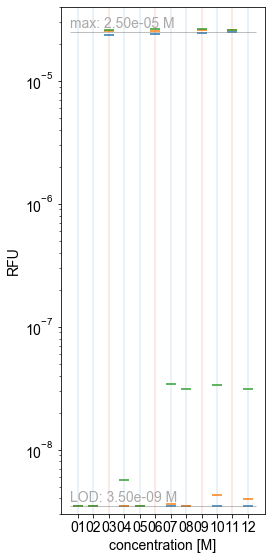

In [27]:
df,x,y = data, data.well.str[1:], data.conc_scope_int
lod = lods['rfu_scope_int']
maxval = 25e-6

series = ['std-int']
plot(df,x,y, series, False)
hline(lod, 'LOD: {:1.2e} M')
# plt.legend(frameon=True)
plt.show()

series = ['+n-s','+n+s','-n+s']
plot(df,x,y, series)
hline(lod, 'LOD: {:1.2e} M')
hline(maxval, 'max: {:1.2e} M')
# plt.legend(frameon=True)
# plt.yticks(ticks=[])
plt.ylim(3e-9, 4e-5)
# plt.savefig('../figs/subfigs/conc_scope.pdf')
plt.show()

## Plate Reader

std-int: 0.9997
std-ext: 0.9999
std-mea: 1.0000
SOD: 1.05e+05 rfu
LOD: 3.01e-10 M
SOD: 1.05e+05 rfu
LOD: 9.84e-10 M
SOD: 1.05e+05 rfu
LOD: nan M


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


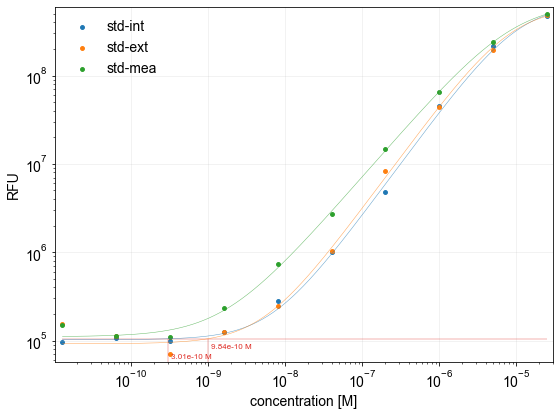

In [26]:
sig_ins = 'rfu_pr'
series = ['std-int','std-ext','std-mea']

df = data.query("series in {}".format(series))
xf = df.conc_fluorophore[df.conc_fluorophore>0]
yf = df[sig_ins][xf.index].copy()

p0 = [1.02480860e+05, 1.19435629e+00, 1.03834366e-05, 6.55221845e+08]
f,fi = log4, log4i
weight = lambda y: y


# FIT ----------------
for ser in series:
    sig_ins_ser = '{}_{}'.format(sig_ins,ser.split('-')[-1])
    
    x = xf[df.series==ser]
    y = yf[x.index]
    popts[sig_ins_ser],pcov = curve_fit(f,x,y, p0=p0, maxfev=int(1e9), sigma=weight(y))

    yh = f(x, *popts[sig_ins_ser])
    res,r2 = stats(y,yh)
    print('{}: {:1.4f}'.format(ser, r2))
    

# LOD and BACK CALC ----------------
yff = data[sig_ins].copy()
yff[yff<sods[sig_ins]] = sods[sig_ins]

for ser in series:
    sig_ins_ser = '{}_{}'.format(sig_ins,ser.split('-')[-1])
    lods[sig_ins_ser] = fi(sods[sig_ins], *popts[sig_ins_ser])
    print('SOD: {:1.2e} rfu'.format(sods[sig_ins]))
    print('LOD: {:1.2e} M'.format(lods[sig_ins_ser]))
    
    data['conc_{}_{}'.format(sig_ins.split('_')[-1],ser.split('-')[-1])] = fi(yff, *popts[sig_ins_ser])
    
# PLOT ----------------
plt.figure(figsize=(8,6))
plt.xlim(xf[xf>0].min()*.8, xf.max()*1.2)
plt.ylim(yf.min()*.8, yf.max()*1.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('input concentration [M]')
plt.ylabel(sig_ins)
plt.grid(which='major', alpha=.2)

for i,ser in enumerate(series):
    sig_ins_ser = '{}_{}'.format(sig_ins,ser.split('-')[-1])

    x = xf[df.series==ser]
    y = yf[x.index]
    plt.scatter(x, y, s=15, label=ser)
    
    xs = np.geomspace(x.min(),x.max(),1000)
    plt.plot(xs, f(xs, *popts[sig_ins_ser]), lw=.5, alpha=.7)

    plt.vlines(lods[sig_ins_ser], yf.min()*.8,sods[sig_ins], lw=.35, color='#de2d26')
    plt.annotate('{:1.2e} M'.format(lods[sig_ins_ser]), (lods[sig_ins_ser]*1.1, yf.min()*.87+i*2e4), color='#de2d26', fontsize=8)

plt.hlines(sods[sig_ins], xf.min(),xf.max(), lw=.35, color='#de2d26')
plt.legend(frameon=False)
plt.show()

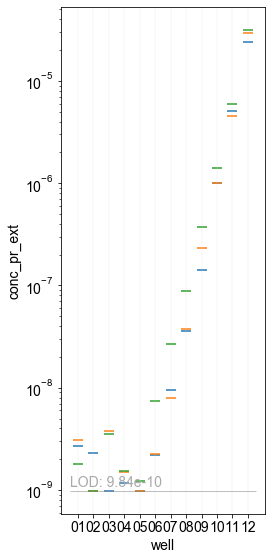

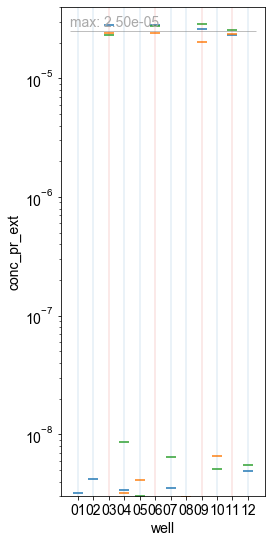

In [21]:
sig_ins_ser = 'rfu_pr_ext'
conc_ins_ser = 'conc_{}'.format('_'.join(sig_ins_ser.split('_')[1:]))
df,x,y = data, data.well.str[1:], data[conc_ins_ser]
maxval = 25e-6

lod = lods[sig_ins_ser]

series = ['std-int', 'std-ext','std-mea']
plot(df,x,y, series, False)
hline(lod, 'LOD: {:1.2e}')
# plt.legend(frameon=True)
plt.show()

series = ['+n-s','+n+s','-n+s']
plot(df,x,y, series)
hline(lod, 'LOD: {:1.2e}')
hline(maxval, 'max: {:1.2e}')
# plt.legend(frameon=True)
plt.ylim(3e-9, 4e-5)
plt.savefig('../figs/subfigs/conc_pr.pdf')
plt.show()

## qPCR

std-int: 1.0000
std-ext: 1.0000
std-mea: 1.0000
SOD: 3.17e+01 rfu
LOD: 9.11e-18 M
ef: 132.8%

SOD: 3.17e+01 rfu
LOD: 2.52e-17 M
ef: 112.1%

SOD: 3.17e+01 rfu
LOD: 4.04e-18 M
ef: 96.3%



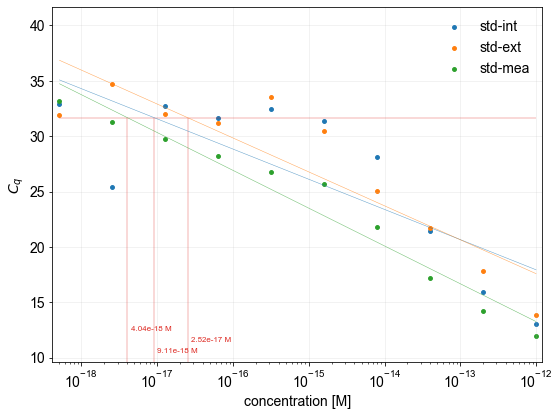

In [25]:
sig_ins = 'cq_qpcr'
series = ['std-int', 'std-ext', 'std-mea', 'std-pcr']
series = ['std-int', 'std-ext', 'std-mea']


df = data.query("series in {}".format(series))
xf = df.conc_dna[df.conc_dna>0]
yf = df[sig_ins][xf.index].copy()

p0=[-3.5248356 , -29.46288389]
f, fi = slogx2, slogx2i
weight = lambda y: None


# FIT ----------------
for ser in series:
    sig_ins_ser = '{}_{}'.format(sig_ins,ser.split('-')[-1])
    
    x = xf[df.series==ser]
    y = yf[x.index]
    popts[sig_ins_ser],pcov = curve_fit(f,x,y, p0=p0, maxfev=int(1e9), sigma=weight(y))

    yh = f(x, *popts[sig_ins_ser])
    res,r2 = stats(y,yh)
    print('{}: {:1.4f}'.format(ser, r2))
    

# LOD and BACK CALC ----------------
yff = data[sig_ins].copy()
yff[yff>sods[sig_ins]] = sods[sig_ins]

for ser in series:
    sig_ins_ser = '{}_{}'.format(sig_ins,ser.split('-')[-1])
    lods[sig_ins_ser] = fi(sods[sig_ins], *popts[sig_ins_ser])
    print('SOD: {:1.2e} rfu'.format(sods[sig_ins]))
    print('LOD: {:1.2e} M'.format(lods[sig_ins_ser]))
    print('ef: {:3.1f}%\n'.format(100*(10**(-1/popts[sig_ins_ser][0])-1)))
    
    data['conc_{}_{}'.format(sig_ins.split('_')[-1],ser.split('-')[-1])] = fi(yff, *popts[sig_ins_ser])
    
# PLOT ----------------
plt.figure(figsize=(8,6))
plt.xlim(xf[xf>0].min()*.8, xf.max()*1.2)
plt.ylim(yf.min()*.8, yf.max()*1.2)
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('input concentration [M]')
plt.ylabel(sig_ins)
plt.grid(which='major', alpha=.2)

for i,ser in enumerate(series):
    sig_ins_ser = '{}_{}'.format(sig_ins,ser.split('-')[-1])

    x = xf[df.series==ser]
    y = yf[x.index]
    plt.scatter(x, y, s=15, label=ser)
    
    xs = np.geomspace(x.min(),x.max(),1000)
    plt.plot(xs, f(xs, *popts[sig_ins_ser]), lw=.5, alpha=.7)

    plt.vlines(lods[sig_ins_ser], yf.min()*.8,sods[sig_ins], lw=.35, color='#de2d26')
    plt.annotate('{:1.2e} M'.format(lods[sig_ins_ser]), (lods[sig_ins_ser]*1.1, yf.min()*.87+i), color='#de2d26', fontsize=8)

plt.hlines(sods[sig_ins], xf.min(),xf.max(), lw=.35, color='#de2d26')

plt.legend(frameon=False)
plt.show()

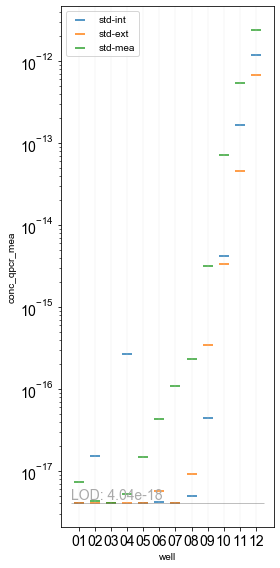

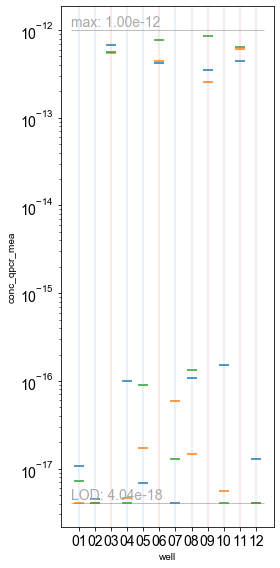

In [26]:
sig_ins_ser = 'cq_qpcr_mea'
conc_ins_ser = 'conc_{}'.format('_'.join(sig_ins_ser.split('_')[1:]))
df,x,y = data, data.well.str[1:], data[conc_ins_ser]
maxval = 1e-12

series = ['std-int', 'std-ext','std-mea']
plot(df,x,y, series, False)
hline(lods[sig_ins_ser], 'LOD: {:1.2e}')
plt.legend(frameon=True)
plt.show()

series = ['+n-s','+n+s','-n+s']
plot(df,x,y, series)
hline(lods[sig_ins_ser], 'LOD: {:1.2e}')
hline(maxval, 'max: {:1.2e}')
# plt.legend(frameon=True)
plt.savefig('../figs/subfigs/conc_qpcr.pdf')

plt.show()

# Cross-Compare

In [ ]:
x = 'rfu_scope'
y = 'rfu_pr'
df = data[data[x]>0]
df.plot.scatter(x,y, figsize=(6,6))
plt.xscale('log')
plt.yscale('log')
xmin, xmax = df[x].min(), df[x].max()
ymin, ymax = df[y].min(), df[y].max()
plt.xlim(xmin,xmax*1.2)
plt.ylim(ymin,ymax*1.2)
plt.plot(np.linspace(xmin,xmax),np.linspace(xmin,xmax), lw=.5, color='grey')
plt.show()

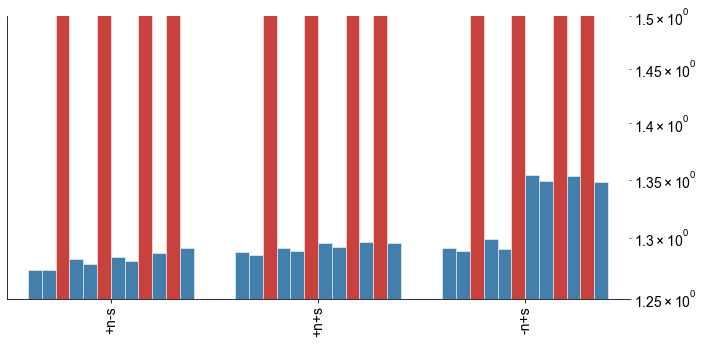

In [424]:
data['col'] = data.well.str[1:]
c0='#3182bd'  # '#3182bd'
c1='#de2d26'
c_d = {'01': c0,
       '02': c0,
       '03': c1,
       '04': c0,
       '05': c0,
       '06': c1,
       '07': c0,
       '08': c0,
       '09': c1,
       '10': c0,
       '11': c1,
       '12': c0}
sig_ins = 'rfu_scope'
sns.catplot(data=data[(~data.series.str.contains('std')) 
                      & (~data[sig_ins].isna())
                      ],
                    edgecolor='#ffffff', lw=.5, alpha=1,legend=False, aspect=2,
                    x='series', y=sig_ins, kind='bar',
                    hue='col', palette=c_d)
# & (data.col.apply(lambda x: x in['01','02','04','05','07','08','10','12']))
# hue='col', palette=c_d

# plt.ylim(1e5,2.7e5) 

plt.yscale('log')
plt.gca().yaxis.tick_right()
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.ylim(1.25,1.5)
plt.show()

# Figure 5B

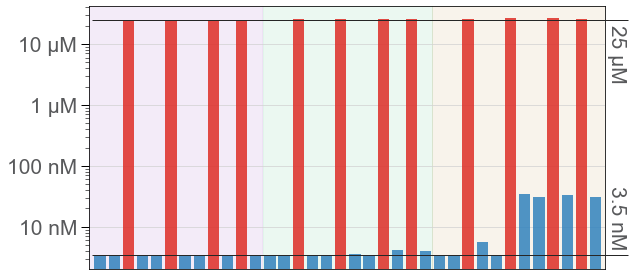

In [187]:
# -----
sig = 'rfu'
ins = 'scope'
ser = 'int'
high = {'rfu': 25e-6, 'cq':1e-12}[sig]
low = lods['_'.join([sig,ins,ser])]

df=data[  (~data.series.str.contains('std')) 
        & (~data['_'.join([sig,ins])].isna())
       ]
x = df.well
y = df['_'.join(['conc',ins,ser])]

plot2(df,x,y, low, high)
plt.tight_layout()
plt.savefig('../figs/subfigs/{}.pdf'.format(ins))
plt.show()

# Plate Maps

In [675]:
def show_plate(platemap, text=[], alpha=.5, save_name=False):
    radius=3
    pm = platemap
    row_labels = pm.well.str[0]
    col_labels = pm.well.str[1:]
    plt.figure(figsize=(8,8))
    print(text)
    for x,y,tt,a in zip(pm.x,pm.y,pm[text].itertuples(index=False), alpha):
        if a == 0:
            color = (49/255, 130./255, 189./255, .2)
        else:
            color = (222./255, 45./255, 38./255, a)
        cir = plt.Circle((x,y), radius, fc=color) # ec=(0,0,0,.5)
        plt.gca().add_artist(cir)
        s = ''
        for t in tt:
            if ((isinstance(t, (int, float, complex)) and ~np.isnan(t)) or (type(t)==str)):
                s +='{}'.format(t)
            s += '\n'
        s = s[:-1]
#         plt.annotate(xy=(x,y), s=s)
    plt.xlim(pm.x.min()-2.5*radius, pm.x.max()+2*radius)
    plt.ylim(pm.y.min()-2.5*radius, pm.y.max()+2*radius)
    plt.yticks(pm.y.unique(), row_labels.unique())
    plt.xticks(pm.x.unique(), col_labels.unique())
    
    plt.gca().xaxis.tick_top()
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.box(False)
    plt.tick_params(color='grey')
    if save_name:
        plt.savefig(save_name)
    plt.show()
    
def log_map(iterable, mn=0):
    if mn==0:
        mn = iterable[iterable>0].min()
    lg = np.log(iterable + mn)
    return ((lg - lg.min())/(lg - lg.min()).max()).fillna(0)

['n']


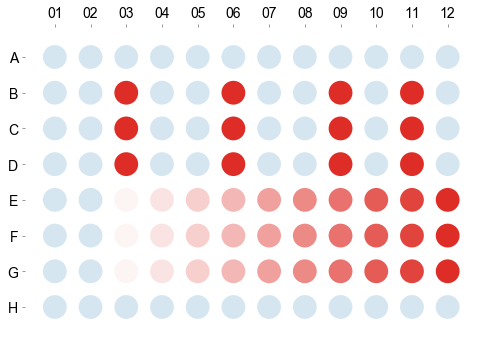

In [676]:
show_plate(data, text=['n'], alpha=log_map(data['conc_fluorophore']), save_name='input-plate.pdf')

['n']


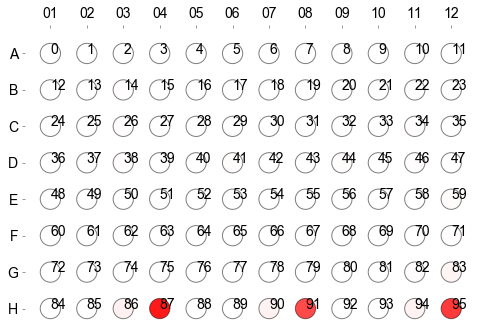

In [87]:
show_plate(data, text=['n'], alpha=(data.conc_qpcr_int - data.conc_qpcr_int.min())/data.conc_qpcr_int.max())